In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score

In [79]:
df = pd.read_csv('NFLX.csv')

In [23]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [11]:
df.shape

(1009, 7)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


## DATA PREPARTION

In [25]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [21]:
df['Date']=pd.to_datetime(df['Date'])

In [31]:
viz = df.copy()
viz

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [35]:
print(df.shape)
print(df.size)

(1009, 7)
7063


In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1009.0,4.190597e+02,1.085375e+02,2.339200e+02,3.314900e+02,3.777700e+02,5.091300e+02,6.923500e+02
High,1009.0,4.253207e+02,1.092630e+02,2.506500e+02,3.363000e+02,3.830100e+02,5.156300e+02,7.009900e+02
Low,1009.0,4.123740e+02,1.075559e+02,2.312300e+02,3.260000e+02,3.708800e+02,5.025300e+02,6.860900e+02
Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Adj Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Volume,1009.0,7.570685e+06,5.465535e+06,1.144000e+06,4.091900e+06,5.934500e+06,9.322400e+06,5.890430e+07


In [41]:
train , test = train_test_split(df,test_size=0.2)

In [42]:
test_pred  = test.copy()

In [43]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
918,2021-09-28,589.000000,599.539978,580.159973,583.849976,583.849976,4431100
809,2021-04-23,509.010010,509.700012,500.700012,505.549988,505.549988,7307700
923,2021-10-05,606.940002,640.390015,606.890015,634.809998,634.809998,9534300
147,2018-09-05,360.000000,363.390015,335.829987,341.179993,341.179993,13092800
158,2018-09-20,370.260010,370.260010,363.170013,365.359985,365.359985,6768100


In [45]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
955,2021-11-18,691.609985,691.739990,679.739990,682.020020,682.020020,2012900
802,2021-04-14,554.869995,554.869995,538.530029,540.020020,540.020020,3740300
659,2020-09-17,475.160004,478.399994,463.269989,470.200012,470.200012,5379300
588,2020-06-08,416.000000,420.799988,406.500000,419.489990,419.489990,5851500
630,2020-08-06,504.109985,510.820007,498.700012,509.079987,509.079987,3725900


In [46]:
x_train = train[['Open','High','Low','Volume']].values
x_test = test[['Open','High','Low','Volume']].values

In [48]:
y_train = train['Close']
y_test = test['Close']

## LINEAR REGRESSION

In [51]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [52]:
y_pred = model.predict(x_test)

In [53]:
result = model.predict([[262.000000, 267.899994, 250.029999, 11896100]])
print(result)

[257.63878817]


## EVALUATION OF THE MODEL

In [57]:
print("MSE",round(mean_squared_error(y_test,y_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred), 3))

MSE 20.043
RMSE 4.477
MAE 3.001
MAPE 0.008
R2 Score :  0.998


In [62]:
data = pd.DataFrame(viz[['Date','Close']])
data=data.reset_index()
data.drop('index',axis=1)
data.set_index('Date',inplace=True)
data = data.asfreq('D')
data

,index,Close
Date,,
2018-02-05,0.0,254.259995
2018-02-06,1.0,265.720001
2018-02-07,2.0,264.559998
2018-02-08,3.0,250.100006
2018-02-09,4.0,249.470001
...,...,...
2022-01-31,1004.0,427.140015
2022-02-01,1005.0,457.130005
2022-02-02,1006.0,429.480011


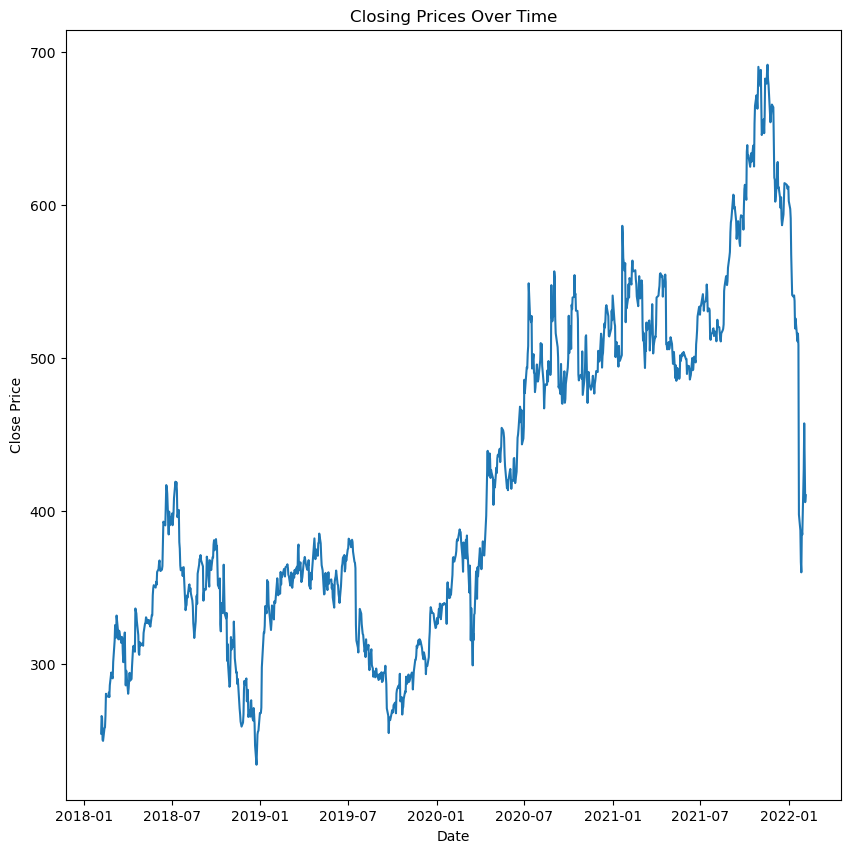

In [72]:
plt.figure(figsize=(10, 10))  # Adjust the width and height as needed
plt.plot(viz['Date'], viz['Close'])# Additional plot customization or show the plot
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

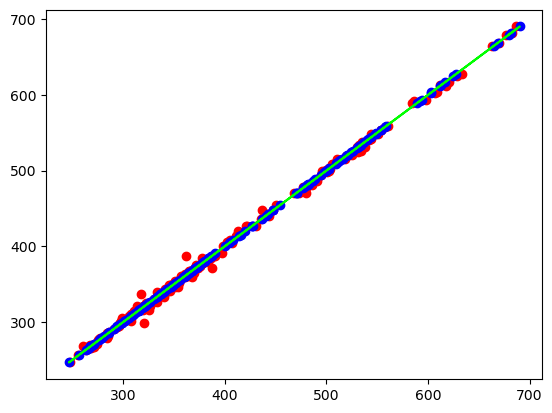

In [73]:
plt.scatter(y_pred, y_test, color='red', marker='o')
plt.scatter(y_test, y_test, color='blue')
plt.plot(y_test, y_test, color='lime')

In [76]:
test_pred['Close_Predicition'] = y_pred
test_pred

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Predicition
955,2021-11-18,691.609985,691.739990,679.739990,682.020020,682.020020,2012900,682.173708
802,2021-04-14,554.869995,554.869995,538.530029,540.020020,540.020020,3740300,541.776845
659,2020-09-17,475.160004,478.399994,463.269989,470.200012,470.200012,5379300,468.389997
588,2020-06-08,416.000000,420.799988,406.500000,419.489990,419.489990,5851500,412.455073
630,2020-08-06,504.109985,510.820007,498.700012,509.079987,509.079987,3725900,505.345117
...,...,...,...,...,...,...,...,...
936,2021-10-22,651.809998,665.460022,651.809998,664.780029,664.780029,6186000,663.256310
522,2020-03-04,377.769989,384.010010,370.510010,383.790009,383.790009,5487300,377.191773
418,2019-10-03,267.779999,268.839996,257.010010,268.149994,268.149994,8951000,260.275024
525,2020-03-09,343.859985,357.470001,341.720001,346.489990,346.489990,7405500,353.553014


In [78]:
test_pred[['Close', 'Close_Predicition']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,202.0,408.111731,105.737683,246.389999,322.577499,371.014999,499.472488,690.309998
Close_Predicition,202.0,408.484416,105.948616,247.115761,324.333297,370.587091,500.240157,686.409343
